# Best practices and hyperparameter tuning

Most of the contents of this chapter are discussed in Raschka, chapter 6.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd = os.getcwd()
pwd

'G:\\My Drive\\Teaching\\Wien\\Python for Finance\\PfF2\\S2022 - Copy\\Course Material_all'

We will use data of German bank customers applying for a loan in this chapter. The target variable is the column `Creditability`, which takes the values 0 and 1.

In [3]:
df = pd.read_csv(pwd + '/data/german_credit.csv')
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [4]:
df.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [5]:
df.describe(include='all')

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

# Pipelines

`Pipeline` objects combine multiple steps in a `sklearn` machine learning project. They can consist of any number of `sklearn` transformers and optionally include a `sklearn` estimator as the final step.

We can create a `Pipeline` by directly calling its constructor or, as we do here, by using the function `make_pipeline`. The arguments passed are the transformers and estimators that will make up the `Pipeline` in sequential order.

In [8]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver = 'saga'))

The attribute `named_steps` is a dictionary-like object containing the named components of the `Pipeline`. The names are assigned by the function `make_pipeline` automatically.

In [9]:
pipe_lr.named_steps

{'standardscaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'logisticregression': LogisticRegression(random_state=1, solver='saga')}

If we use the constructor to create the pipeline, we need to provide the names of the steps as follows.

In [10]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('lreg', LogisticRegression(random_state=1, solver = 'saga'))])
pipe_lr.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'lreg': LogisticRegression(random_state=1, solver='saga')}

The `Pipeline` method `fit` applies the methods `fit` and `transform` of all but the final estimator, of which it applies only `fit`. The `Pipeline` method `predict` conducts all the transformations of the steps contained in the `Pipeline` before applying the `predict` method of the final estimator.

<center>

<img src="images/06_01.png" align="center" width="800" />
</center>
(Raschka)

In [11]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.655


We can access the steps of the `Pipeline` via their position in a list.

In [12]:
pipe_lr[1]

PCA(n_components=2)

In [13]:
pipe_lr[0:2]

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

# Cross-Validation

## The holdout method

If we want to optimize our learner's hyperparameters, we cannot use the performance on the test data for that purpose because it would __leak__ information, thus invalidating a later final evaluation of the performance based on the same data. Therefore, we need to split the training data into data used for the estimation of the model (__training set__), and data used to evaluate the performance (__validation set__) with the goal of improving the choice of hyperparameter values. 

The holdout method is the simplest way of conducting cross-validation, i.e., evaluating the performance on data other than the training data. It is illustrated in the figure below.

<center>

<img src="images/06_02.png" align="center" width="800" />
</center>
(Raschka)

## K-fold cross-validation

The holdout method can be quite sensitive to the split of the data, i.e., different random assignments of the samples to the training and validation set can lead to substantially different models and performance. Therefore, more robust methods are preferred, a very popular one being k-fold cross-validation.

The data is split into $k$ folds, i.e., subsets of equal size, $k-1$ of which are used for training the model and the remaining one for performance evaluation. Instead of relying on one particular validation set, the procedure is repeated $k$ times, such that each fold serves as the validation set once. The performance estimate is then the average of the performances over those $k$ validations.

<center>

<img src="images/06_03.png" align="center" width="800" />
</center>
(Raschka)

### Stratified k-fold cross-validation

Stratified k-fold cross-validation is a variation of k-fold cross-validation that assures that the proportions of each class in the data are preserved in the individual folds.

`sklearn` implements a generator returning the training and validation data for stratified k-fold cross-validation in the method `split` of the class `StratifiedKFold`. The parameter `n_splits` specifies the number of folds, `shuffle=True` randomly shuffles each class's samples before splitting the data into folds.

In [14]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)

We iterate and compute the performance for each fold. Using the `Pipeline`, for each fold we perform the respective `fit` and `transform` operations only on the data used for training the model.

In [15]:
scores = []
for k, (train, val) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[val], y_train[val])
    scores.append(score)
    print('Fold: %2d, Class distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class distribution: [216 504], Accuracy: 0.675
Fold:  2, Class distribution: [216 504], Accuracy: 0.675
Fold:  3, Class distribution: [216 504], Accuracy: 0.775
Fold:  4, Class distribution: [216 504], Accuracy: 0.700
Fold:  5, Class distribution: [216 504], Accuracy: 0.725
Fold:  6, Class distribution: [216 504], Accuracy: 0.713
Fold:  7, Class distribution: [216 504], Accuracy: 0.762
Fold:  8, Class distribution: [216 504], Accuracy: 0.738
Fold:  9, Class distribution: [216 504], Accuracy: 0.738
Fold: 10, Class distribution: [216 504], Accuracy: 0.713

CV accuracy: 0.721 +/- 0.032


`sklearn` offers a function `cross_val_score` that conveniently combines the steps contained in the code above. If the parameter `cv` is passed as an integer, a StratifiedKFold with the given number of folds will be created. Instead, we can also use `cv` to pass such an object.

In [16]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.75   0.725  0.7625 0.725  0.7375 0.7875 0.725  0.6125 0.7    0.6625]
CV accuracy: 0.719 +/- 0.048


In [17]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)

In [18]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=kfold, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.675  0.675  0.7625 0.7    0.725  0.7125 0.7625 0.7375 0.7375 0.7125]
CV accuracy: 0.720 +/- 0.030


# Debugging algorithms with learning and validation curves

What follows is a reminder of the two characteristics we would like to minimize: bias and variance. If the performance is poor both for the training and the validation data, the problem is the __bias__ of the model, resulting from underfitting the data. If the performance for the validation data is much worse than that for the training data, the problem is the __variance__ of the model, resulting from overfitting the training data.

<center>

<img src="images/06_04.png" align="center" width="800" />
</center>
(Raschka)

## Learning curves

We can use learning curves to see how the performance of the learner depends on the size of the training data. In the case of the estimator used here, it appears that the training set should contain at least 640 samples as otherwise there is a problem with overfitting, as indicated by the poorer performance for the validation set compared to the training set.

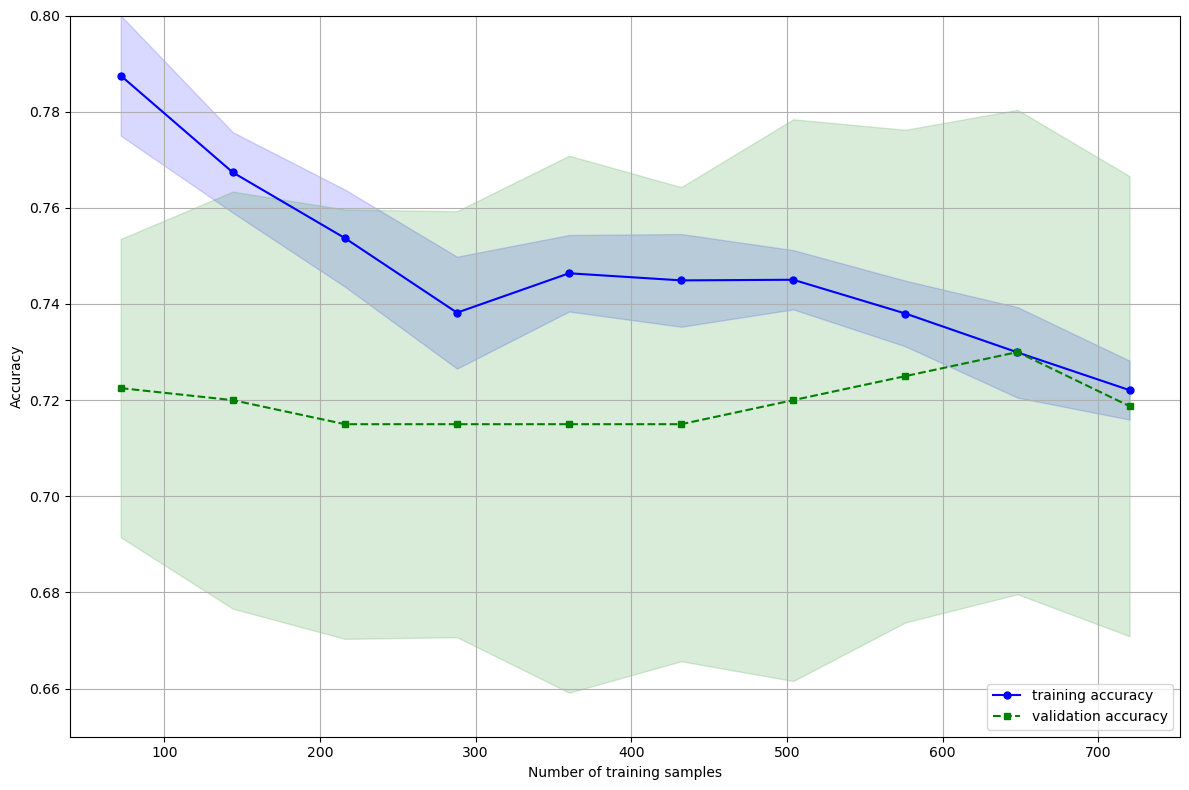

In [19]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.65, 0.80])
plt.tight_layout()
plt.show()

## Validation curves

Validation curves return lists containing training and validation scores for different values of a given hyperparameter. The argument `param_range` is a list containing the values of the hyperparameter that are to be considered. `param_name` is the name of the parameter. Since the estimator is a pipeline here, the name of the hyperparameter is `estimatorname__hyperparametername`, where `estimatorname` is the name we assigned to the estimator when defining the `Pipeline`.

In this example, the validation curve suggests that a value for the hyperparameter `C`, which is the inverse of the penalty parameter of the Ridge Regression, should be about 10.

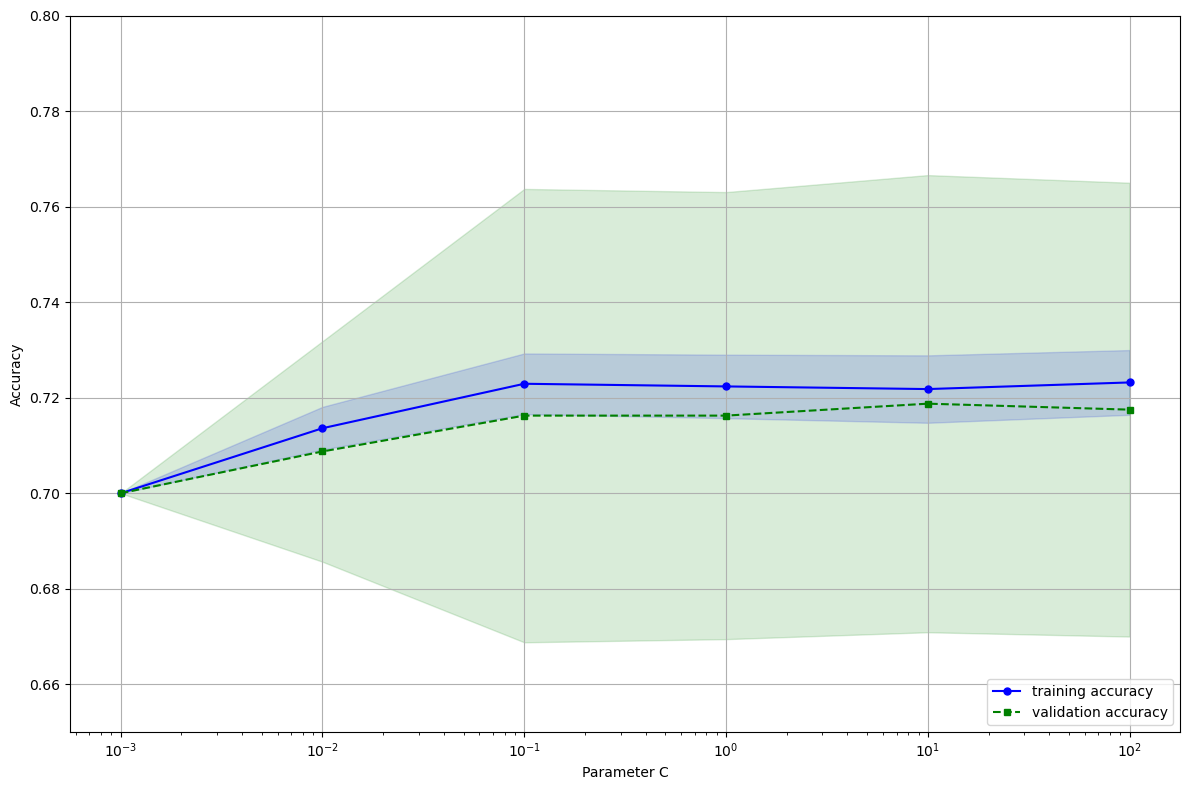

In [20]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='lreg__C', 
                                             param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,8))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.65, 0.8])
plt.tight_layout()
plt.show()

## Tuning hyperparameters via grid search

Instead of considering validation curves for individual hyperparameters, we can automate the identification of the optimal combination of hyperparameters using a method called grid search. Grid search trains and evaluates models using all combinations of values for the hyperparameters specified.

Grid search cross-validation is available in scikit-learn's class `GridSearchCV`. Below, we create a `GridSearchCV` object for the pipeline we constructed earlier, with 10-fold cross-validation, and the objective to maximize the accuracy. The argument `param_grid` defines the parameter grid and is represented as a list of dictionary-like objects. Each of those objects defines a set of parameter combinations.

In [21]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'lreg__C': param_range, 'lreg__penalty': ['l1', 'l2']},
              {'lreg__C': param_range, 'lreg__penalty': ['elasticnet'], 'lreg__l1_ratio': [0.2,0.4,0.6,0.8]}]

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

After fitting the `GridSearchCV` object, its attribute `best_params_` contains the parameter combination achieving the best performance in the cross-validation, whereas `best_score_` contains this best performance.

In [22]:
print(gs.best_params_)
print(gs.best_score_)

{'lreg__C': 10.0, 'lreg__l1_ratio': 0.8, 'lreg__penalty': 'elasticnet'}
0.72


The scores of the `GridSearchCV` object correspond to those obtained with the best parameter setting. Note that the performance on the test data here is inferior to that on the training data. This issue can arise because the model was optimized for its performance on the training data.

In [23]:
print('Training accuracy: %.3f' % gs.score(X_train, y_train))
print('Test accuracy: %.3f' % gs.score(X_test, y_test))

Training accuracy: 0.718
Test accuracy: 0.655


## Algorithm selection with nested cross-validation

We have just seen that the performance on the test data can differ from that on the training data even if we use cross-validation. Thus, if, e.g., we want to choose between multiple algorithms that we each train via cross-validation, we cannot use the performance based on the training data to compare the algorithms' suitability. 

Instead of evaluation performance based on only one split into training and test data, we can use cross-validation again so that the evaluation performance does not depend on one arbitrary split of the data. This is called nested cross-validation. In nested cross-validation, there is an outer loop over the splits of the original data into training and test data, and an inner loop applying cross-validation within the training data so as to optimize the hyperparameters.

The figure below shows what is called a 5x2 cross-validation with 5 outer and 2 inner folds.

<center>

<img src="images/06_07.png" align="center" width="1000" />
</center>
(Raschka)

We can implement nested cross-validation with a `GridSearchCV` object `gs` for the inner loop and call the function `cross_val_score`, using `gs` as the estimator, for the outer loop.

In this example, we compare our pipeline and simple decision trees. We find that they perform similarly on the given task.

In [24]:
pipe_lr = Pipeline([('scaler', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('lreg', LogisticRegression(solver = 'saga', random_state=1))])

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.713 +/- 0.019


In [25]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.716 +/- 0.025


## Optimizing different performance evaluation metrics

When applying cross-validation, the predictive accuracy is optimized by default. A different performance measure can be chosen through the parameter `scoring`. It can take as its value the name of one among various performance metrics available in `sklearn`.

In [26]:
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='precision', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7400453155750715
{'lreg__C': 10.0, 'lreg__l1_ratio': 0.4, 'lreg__penalty': 'elasticnet'}


In [27]:
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='recall', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

1.0
{'lreg__C': 0.0001, 'lreg__penalty': 'l1'}


Instead of using one of the existing scoring functions with their default setting, we can instead use the function `make_scorer` to create a bespoke scorer object. If the scorer is based on one of the existing `sklearn` performance metrics, we can pass arguments that parameterize the scoring function.

In the example below, we use the `recall_score` with the parameter `pos_label=0`, which changes the class that is considered the positive outcome.

We could even define our own scoring functions and create the scorer objects based on them via `make_scorer`, too. We will see an example for this in the next subsection.

In [28]:
scorer = make_scorer(recall_score, pos_label=0)

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.22916666666666669
{'lreg__C': 1.0, 'lreg__penalty': 'l1'}


## Dealing with class imbalance

If there is a substantial imbalance between the numbers of samples in the different classes (as is frequently the case, including in the data set used in this chapter), the default settings when training a learner will give more importance to the predictions for the more common class. E.g., if 95\% of the samples are in class 1, we can easily achieve 95\% accuracy by predicting class 1 for all samples. This is rarely what we actually intend.

### Changing weights in the cost function

The hyperparameter `class_weight` changes the weights of samples in the cost function. E.g., `class_weight='balanced'` assigns equal importance to the performance of each of the classes, independently of the number of samples in those classes.

Note that we still need to specify the corresponding performance metric for the `GridSearchCV`. Otherwise, it will use the default accuracy measure without differential weighting when selecting the best model. Therefore, we define our own scoring function that we use in the `GridSearchCV` object.

In [29]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), 
                    ('lreg', LogisticRegression(solver = 'saga', class_weight='balanced', random_state=1))])

def weighted_accuracy(y_true, y_pred, w0=0, w1=0):        
    diff = y_true - y_pred
    num_zeros = (y_true == 0).sum()
    num_ones = (y_true == 1).sum()
    if w0 == 0:
        w1 = 1
        w0 = num_ones / num_zeros
    weights = num_zeros * w0 + num_ones * w1
    diff_zeros_wrong = (diff == -1).sum()
    diff_ones_wrong = (diff == 1).sum()
    wrong = diff_zeros_wrong * w0 + diff_ones_wrong * w1
    return (weights-wrong)/weights

scorer = make_scorer(weighted_accuracy)

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scorer, cv=10)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6779761904761905
{'lreg__C': 0.01, 'lreg__l1_ratio': 0.6, 'lreg__penalty': 'elasticnet'}


`class_weight` can also be specified as a dictionary, defining for each class the weight assigned to each sample. E.g., in our data set evaluating bank customers' credit worthiness, if we consider it five times more costly to incorrectly classify a credit unworthy customer as credit worthy than vice versa, we will specify the weights as follows.

In [30]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), 
                    ('lreg', LogisticRegression(solver = 'saga', class_weight={0: 5, 1: 1}, random_state=1))])

scorer = make_scorer(weighted_accuracy, w0=5, w1=1)

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scorer, cv=10)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7198863636363636
{'lreg__C': 100.0, 'lreg__penalty': 'l1'}


### Upsampling the underrepresented class

An alternative to changing the cost function is to upsample the data by randomly drawing additional data from the class comprising fewer samples. We can do so by using the function `resample` that takes as arguments the feature matrix and target vector from which to resample, a boolean `replace` indicating whether to draw with replacement, and the number `n_samples` of samples to draw.

In this example, we draw as many samples of class 0 as there are samples of class 1.

In [31]:
print('Number of class 0 samples before:', X[y == 0].shape[0])

X_upsampled, y_upsampled = resample(X[y == 0], y[y == 0], replace=True, n_samples=X[y == 1].shape[0], random_state=123)

print('Number of class 0 samples after:', X_upsampled.shape[0])

Number of class 0 samples before: 300
Number of class 0 samples after: 700


We combine the resampled data with the data of the larger class in a new data set.

In [32]:
X_bal = np.vstack((X[y == 1], X_upsampled))
y_bal = np.hstack((y[y == 1], y_upsampled))

We then split the data again and fit the model.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, stratify=y_bal, random_state=1)

In [34]:
pipe_lr = Pipeline([('scaler', StandardScaler()), 
                    ('pca', PCA(n_components=2)), 
                    ('lreg', LogisticRegression(solver = 'saga', random_state=1))])

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6892857142857142
{'lreg__C': 0.01, 'lreg__l1_ratio': 0.4, 'lreg__penalty': 'elasticnet'}
